In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Load Data

In [2]:
matches = pd.read_csv("vct_data/test_preprocessed.csv")

features = [
    "Team A_Encoded", 
    "Team B_Encoded",

    "Team A H2H Win %",
    "Team B H2H Win %",

    "Team A Tournament Win %",
    "Team B Tournament Win %",

    "Recent Win %_TeamA",
    "Recent Win %_TeamB",

    "Team A Map Win %",
    "Team B Map Win %",

    "Round Win %_RollAvg_TeamA",
    "Round Win %_RollAvg_TeamB",

    "Attacker Win %_RollAvg_TeamA",
    "Attacker Win %_RollAvg_TeamB",

    "Overtime Win %_RollAvg_TeamA",
    "Overtime Win %_RollAvg_TeamB",

    "KDA_RollAvg_TeamA",
    "KDA_RollAvg_TeamB",

    "First Blood %_RollAvg_TeamA",
    "First Blood %_RollAvg_TeamB",

    "Headshot %_RollAvg_TeamA",
    "Headshot %_RollAvg_TeamB",

    "Clutches_RollAvg_TeamA",
    "Clutches_RollAvg_TeamB",

    "Econ_RollAvg_TeamA",
    "Econ_RollAvg_TeamB",
]

X_test = matches[features]
y_test = matches["Winner"]

X_test.head()

,Team A_Encoded,Team B_Encoded,Team A H2H Win %,Team B H2H Win %,Team A Tournament Win %,Team B Tournament Win %,Recent Win %_TeamA,Recent Win %_TeamB,Team A Map Win %,Team B Map Win %,Round Win %_RollAvg_TeamA,Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamB,KDA_RollAvg_TeamA,KDA_RollAvg_TeamB,First Blood %_RollAvg_TeamA,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamA,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamA,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamA,Econ_RollAvg_TeamB
0,0.447334,0.414839,0.5,0.5,0.500000,0.571429,0.4,0.6,0.200000,0.666667,0.440863,0.489425,0.450000,0.562500,0.000,0.025,1.301095,1.379461,0.513037,0.475159,0.2098,0.2452,1.6,1.8,50.04,52.34
1,0.572950,0.371567,1.0,0.0,0.533333,0.680000,0.3,0.4,0.666667,0.666667,0.459425,0.524396,0.500000,0.545014,0.025,0.000,1.312059,1.607471,0.460159,0.550017,0.2482,0.2510,1.8,1.4,51.30,57.50
2,0.628433,0.414839,0.0,1.0,0.680000,0.533333,0.6,0.7,0.666667,0.666667,0.524396,0.459425,0.545014,0.500000,0.000,0.025,1.607471,1.312059,0.550017,0.460159,0.2510,0.2482,1.4,1.8,57.50,51.30
3,0.572950,0.371567,0.5,0.5,0.500000,0.692308,0.3,0.4,0.600000,0.700000,0.486508,0.497312,0.491667,0.520014,0.025,0.000,1.367839,1.434472,0.472659,0.531267,0.2430,0.2582,1.9,1.4,52.70,54.70
4,0.628433,0.414839,0.5,0.5,0.692308,0.500000,0.6,0.7,0.700000,0.600000,0.497312,0.486508,0.520014,0.491667,0.000,0.025,1.434472,1.367839,0.531267,0.472659,0.2582,0.2430,1.4,1.9,54.70,52.70


# Load Pretrained Model

In [3]:
model = joblib.load("models/rf_optuna.pkl")
print(model)

RandomForestClassifier(max_depth=33, max_features='log2', min_samples_leaf=10,
                       min_samples_split=3, n_estimators=816, n_jobs=-1,
                       random_state=1)


# Make Predictions

In [4]:
# Predicted Winner
preds = model.predict(X_test)
matches["predicted_winner"] = preds
matches.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded,Winner,predicted_winner
0,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 7,BLEED vs Galaxy Esports,Icebox,Galaxy Esports,13,4,9.0,0.0,BLEED,7,3,4.0,0.0,43.333333,1.164,222.2,82.0,60.0,18.0,22.0,0.730,145.6,0.226,11.0,9.0,2.0,0.806,179.2,60.0,82.0,24.0,-22.0,0.630,119.2,0.240,9.0,11.0,-2.0,19605.000000,10715.000000,Full buy: 20k+,15860.000000,4590.000000,Semi-buy: 10-20k,14.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,67.2,5.0,2.0,10.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,46.2,5.0,0.0,10.0,1.0,2.0,0.0,4.0,2.0,0.0,1.0,4.0,2.0,0.0,1.0,10.0,1.0,2.0,0.0,1.666667,0.650000,0.550000,1.0,0.500000,0.750000,0.0,0.9240,194.40,125.38,1.301095,0.7012,0.440863,0.450000,0.463308,0.000,0.513037,0.2098,1.6,50.04,0.4,1.024390,0.350000,0.450000,3.0,0.250000,0.500000,0.0,0.9710,197.86,129.62,1.379461,0.7036,0.489425,0.562500,0.436111,0.025,0.475159,0.2452,1.8,52.34,0.6,0.500000,0.200000,0.5,0.571429,0.666667,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.447334,0.414839,1,0
1,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 8,BLEED vs KPMOONIIBLM9,Ascent,BLEED,11,5,6.0,0.0,KPMOONIIBLM9,13,6,7.0,0.0,46.366667,0.920,196.2,80.0,86.0,35.0,-6.0,0.684,131.0,0.230,9.0,15.0,-6.0,1.128,205.8,86.0,81.0,43.0,5.0,0.726,143.2,0.290,15

# Setting Up Betting Environment

In [5]:
# 1. Get predicted probabilities for both teams
predicted_probs = model.predict_proba(X_test)

# Extract probabilities of each team winning
predicted_prob_TeamA = predicted_probs[:, 1]  # class '1' is for Team A won
predicted_prob_TeamB = 1 - predicted_prob_TeamA  # Team B's probability is complementary to Team A's

# 2. Generate synthetic odds based on predicted probabilities
odds_TeamA = 1 / predicted_prob_TeamA
odds_TeamB = 1 / predicted_prob_TeamB

# 3. Adjust odds to simulate bookmaker's margin (5% vig)
vig_percentage = 0.05
odds_TeamA_adjusted = 1 / ((1 + vig_percentage) * predicted_prob_TeamA)
odds_TeamB_adjusted = 1 / ((1 + vig_percentage) * predicted_prob_TeamB)

# 4. Add the synthetic odds to the test dataset
matches["predicted_prob_TeamA"] = predicted_prob_TeamA
matches["predicted_prob_TeamB"] = predicted_prob_TeamB
matches["odds_TeamA"] = odds_TeamA_adjusted
matches["odds_TeamB"] = odds_TeamB_adjusted

matches.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded,Winner,predicted_winner,predicted_prob_TeamA,predicted_prob_TeamB,odds_TeamA,odds_TeamB
0,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 7,BLEED vs Galaxy Esports,Icebox,Galaxy Esports,13,4,9.0,0.0,BLEED,7,3,4.0,0.0,43.333333,1.164,222.2,82.0,60.0,18.0,22.0,0.730,145.6,0.226,11.0,9.0,2.0,0.806,179.2,60.0,82.0,24.0,-22.0,0.630,119.2,0.240,9.0,11.0,-2.0,19605.000000,10715.000000,Full buy: 20k+,15860.000000,4590.000000,Semi-buy: 10-20k,14.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,67.2,5.0,2.0,10.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,46.2,5.0,0.0,10.0,1.0,2.0,0.0,4.0,2.0,0.0,1.0,4.0,2.0,0.0,1.0,10.0,1.0,2.0,0.0,1.666667,0.650000,0.550000,1.0,0.500000,0.750000,0.0,0.9240,194.40,125.38,1.301095,0.7012,0.440863,0.450000,0.463308,0.000,0.513037,0.2098,1.6,50.04,0.4,1.024390,0.350000,0.450000,3.0,0.250000,0.500000,0.0,0.9710,197.86,129.62,1.379461,0.7036,0.489425,0.562500,0.436111,0.025,0.475159,0.2452,1.8,52.34,0.6,0.500000,0.200000,0.5,0.571429,0.666667,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.447334,0.414839,1,0,0.365079,0.634921,2.608697,1.500000
1,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 8,BLEED vs KPMOONIIBLM9,Ascent,BLEED,11,5,6.0,0.0,KPMOONIIBLM9,13,6,7.0,0.0,46.366667,0.920,196.2,80.

# Verifying Odds and Probabilities

In [6]:
# Probabilities should always be between 0 and 1
# Odds should always be greater than 1
# Odds should be inversely proportional to the predicted probabilities
print(matches[['predicted_prob_TeamA', 'odds_TeamA', 'predicted_prob_TeamB', 'odds_TeamB']].head(10))


   predicted_prob_TeamA  odds_TeamA  predicted_prob_TeamB  odds_TeamB
0              0.365079    2.608697              0.634921    1.500000
1              0.497602    1.913942              0.502398    1.895669
2              0.480040    1.983960              0.519960    1.831644
3              0.424737    2.242285              0.575263    1.655557
4              0.562785    1.692264              0.437215    2.178291
5              0.863880    1.102446              0.136120    6.996631
6              0.137587    6.922004              0.862413    1.104322
7              0.874351    1.089243              0.125649    7.579695
8              0.127471    7.471341              0.872529    1.091518
9              0.825590    1.153577              0.174410    5.460578


In [7]:
# Check if the sum of probabilities for each match is equal or close to 1
prob_check = matches['predicted_prob_TeamA'] + matches['predicted_prob_TeamB']
prob_check.describe()


count    10121.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64

# Applying Betting Strategies

In [9]:
def kelly_criterion(prob, odds):
    return (prob * (odds - 1) - (1 - prob)) / (odds - 1)

def determine_best_strategy(row):
    flat_prob = max(row["predicted_prob_TeamA"], row["predicted_prob_TeamB"])
    kelly_prob = kelly_criterion(row["predicted_prob_TeamA"], row["odds_TeamA"]) if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"] else kelly_criterion(row["predicted_prob_TeamB"], row["odds_TeamB"])
    
    # Example threshold for choosing the strategy (you can adjust this logic as needed)
    threshold = 0.8
    
    if flat_prob > threshold and kelly_prob > 0:
        return "kelly"
    elif flat_prob > threshold:
        return "flat"
    else:
        return "threshold"

# Add the best_strategy column
matches['best_strategy'] = matches.apply(determine_best_strategy, axis=1)


In [ ]:
matches.head()

# Simulating Bets on Matches

In [10]:
def simulate_betting_with_best_strategy(matches, bankroll=10000):
    total_bet = 0
    total_won = 0
    current_bankroll = bankroll
    profits = []  # List to store profits for each match

    for index, row in matches.iterrows():
        bet_amount = 5  # Default flat betting amount
        bet_team = None
        odds = None
        strategy = row['best_strategy']
        profit = 0  # Initialize profit for this match

        # Determine the betting team and odds based on the best strategy
        if strategy == "flat":
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                odds = row["odds_TeamA"]
            else:
                bet_team = "Team B"
                odds = row["odds_TeamB"]

        elif strategy == "kelly":
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                odds = row["odds_TeamA"]
                prob = row["predicted_prob_TeamA"]
            else:
                bet_team = "Team B"
                odds = row["odds_TeamB"]
                prob = row["predicted_prob_TeamB"]

            # Calculate Kelly fraction
            kelly_fraction = kelly_criterion(prob, odds)
            if kelly_fraction > 0:
                bet_amount = current_bankroll * min(kelly_fraction, 0.3)

        elif strategy == "threshold":
            if row["predicted_prob_TeamA"] > row["predicted_prob_TeamB"]:
                bet_team = "Team A"
                prob = row["predicted_prob_TeamA"]
                odds = row["odds_TeamA"]
            else:
                bet_team = "Team B"
                prob = row["predicted_prob_TeamB"]
                odds = row["odds_TeamB"]

            if prob > 0.8:  # Only bet if probability exceeds threshold
                bet_amount = 10  # Set a higher bet amount for threshold strategy

        # Place the bet if bet_team is selected and bet_amount is positive
        if bet_team and bet_amount > 0:
            total_bet += bet_amount

            # Check if the bet was won
            if (bet_team == "Team A" and row["Winner"] == 1) or (bet_team == "Team B" and row["Winner"] == 0):
                total_won += bet_amount * odds
                current_bankroll += bet_amount * odds - bet_amount
                profit = bet_amount * odds - bet_amount  # Profit from winning the bet
            else:
                current_bankroll -= bet_amount
                profit = -bet_amount  # Loss from the bet

        profits.append(profit)  # Append profit for this match

    # Add profits to the matches DataFrame
    matches['profit'] = profits

# Run the simulation
simulate_betting_with_best_strategy(matches)


In [11]:
matches.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded,Winner,predicted_winner,predicted_prob_TeamA,predicted_prob_TeamB,odds_TeamA,odds_TeamB,best_strategy,profit
0,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 7,BLEED vs Galaxy Esports,Icebox,Galaxy Esports,13,4,9.0,0.0,BLEED,7,3,4.0,0.0,43.333333,1.164,222.2,82.0,60.0,18.0,22.0,0.730,145.6,0.226,11.0,9.0,2.0,0.806,179.2,60.0,82.0,24.0,-22.0,0.630,119.2,0.240,9.0,11.0,-2.0,19605.000000,10715.000000,Full buy: 20k+,15860.000000,4590.000000,Semi-buy: 10-20k,14.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,67.2,5.0,2.0,10.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,46.2,5.0,0.0,10.0,1.0,2.0,0.0,4.0,2.0,0.0,1.0,4.0,2.0,0.0,1.0,10.0,1.0,2.0,0.0,1.666667,0.650000,0.550000,1.0,0.500000,0.750000,0.0,0.9240,194.40,125.38,1.301095,0.7012,0.440863,0.450000,0.463308,0.000,0.513037,0.2098,1.6,50.04,0.4,1.024390,0.350000,0.450000,3.0,0.250000,0.500000,0.0,0.9710,197.86,129.62,1.379461,0.7036,0.489425,0.562500,0.436111,0.025,0.475159,0.2452,1.8,52.34,0.6,0.500000,0.200000,0.5,0.571429,0.666667,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.447334,0.414839,1,0,0.365079,0.634921,2.608697,1.500000,threshold,-5.000000
1,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 8,BLEED vs KPMOONIIBLM9,Ascent,BLEED,11,5,6.0,0.0,KPMOONIIBL

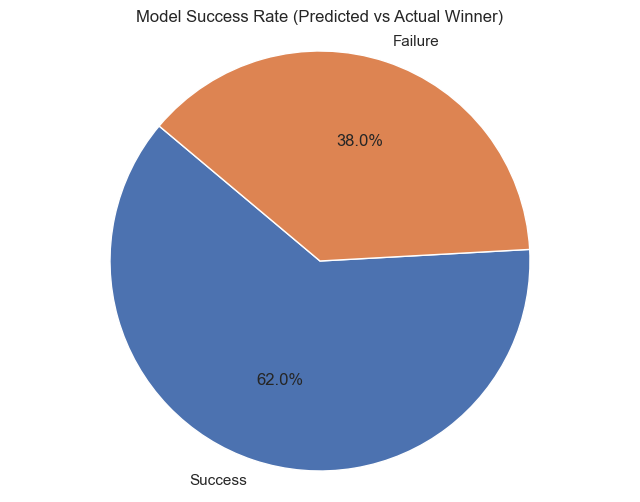

In [12]:
# 1. Model Success Rate (Predicted vs Actual Winner)
def plot_model_success_rate(matches):
    success_count = matches[matches['predicted_winner'] == matches['Winner']].shape[0]
    failure_count = matches[matches['predicted_winner'] != matches['Winner']].shape[0]
    labels = ['Success', 'Failure']
    sizes = [success_count, failure_count]
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Model Success Rate (Predicted vs Actual Winner)')
    plt.axis('equal')
    plt.show()

plot_model_success_rate(matches)

C:\Users\Red\AppData\Local\Temp\ipykernel_17348\2385619884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strategy_counts.index, y=strategy_counts.values, palette='viridis')


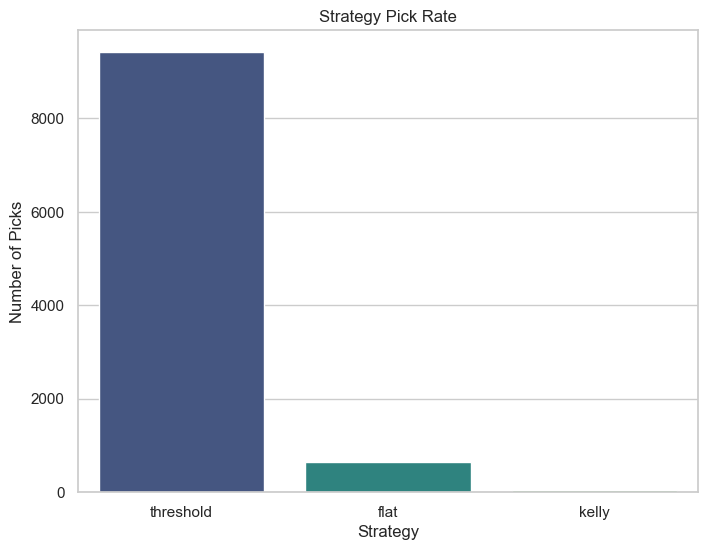

In [13]:
# 2. Strategy Pick Rate
def plot_strategy_pick_rate(matches):
    strategy_counts = matches['best_strategy'].value_counts()
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=strategy_counts.index, y=strategy_counts.values, palette='viridis')
    plt.title('Strategy Pick Rate')
    plt.xlabel('Strategy')
    plt.ylabel('Number of Picks')
    plt.show()

plot_strategy_pick_rate(matches)

C:\Users\Red\AppData\Local\Temp\ipykernel_17348\2820413974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strategy_profits.index, y=strategy_profits.values, palette='magma')


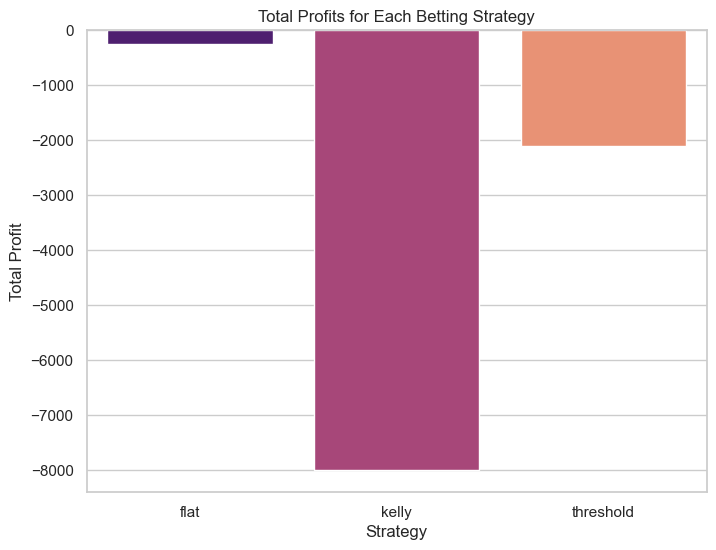

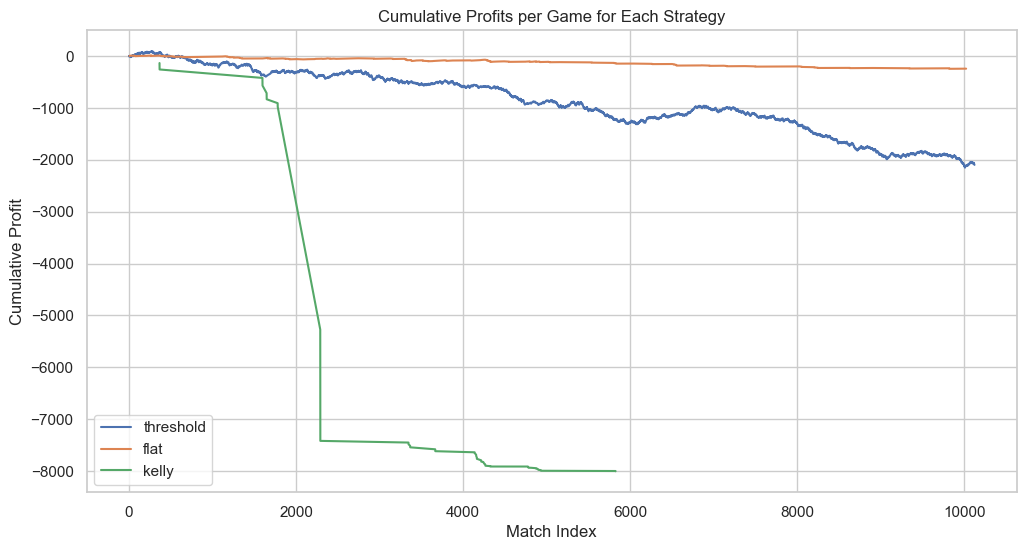

In [14]:
# 3-4. Profits for Each Betting Strategy
def plot_profits_per_strategy(matches):
    strategy_profits = matches.groupby('best_strategy')['profit'].sum()
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=strategy_profits.index, y=strategy_profits.values, palette='magma')
    plt.title('Total Profits for Each Betting Strategy')
    plt.xlabel('Strategy')
    plt.ylabel('Total Profit')
    plt.show()

    # Line chart for profits per game
    plt.figure(figsize=(12, 6))
    for strategy in matches['best_strategy'].unique():
        strategy_matches = matches[matches['best_strategy'] == strategy]
        plt.plot(strategy_matches.index, strategy_matches['profit'].cumsum(), label=strategy)
    
    plt.title('Cumulative Profits per Game for Each Strategy')
    plt.xlabel('Match Index')
    plt.ylabel('Cumulative Profit')
    plt.legend()
    plt.show()

plot_profits_per_strategy(matches)

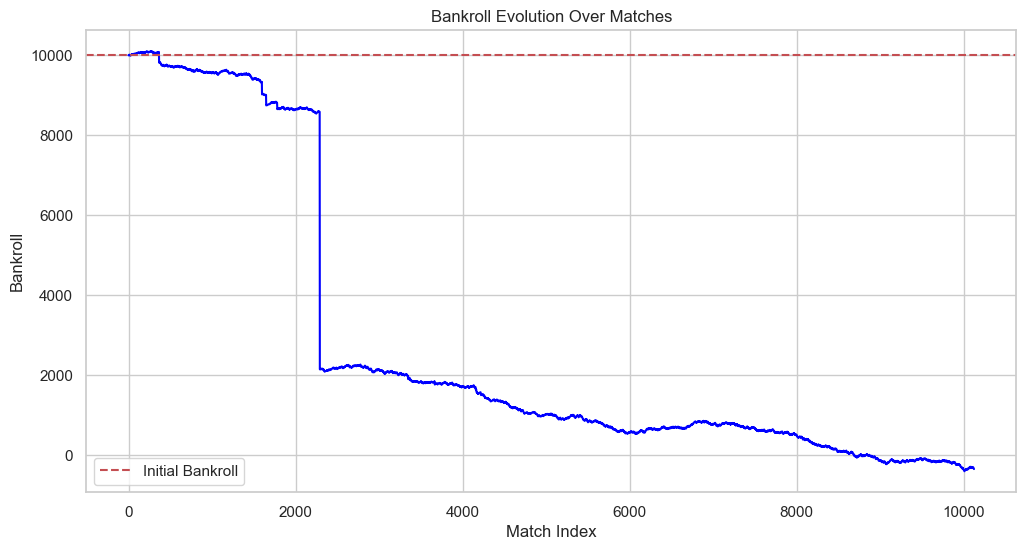

In [15]:
# 5. Bankroll Evolution
def plot_bankroll_evolution(matches, initial_bankroll=10000):
    bankroll = initial_bankroll + matches['profit'].cumsum()
    
    plt.figure(figsize=(12, 6))
    plt.plot(matches.index, bankroll, color='blue')
    plt.title('Bankroll Evolution Over Matches')
    plt.xlabel('Match Index')
    plt.ylabel('Bankroll')
    plt.axhline(y=initial_bankroll, color='r', linestyle='--', label='Initial Bankroll')
    plt.legend()
    plt.show()

plot_bankroll_evolution(matches)